Trying to use last values of N and Y as initial conditions in next iteration.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
%matplotlib inline

from sympy.solvers import solve
from sympy import Symbol

In [3]:
def eqs(x, t):
        Ndot = r*x[0] - q*(x[0]+x[1])*x[0] - beta*x[1]*x[0]
        Ydot = beta*x[1]*x[0] - capgam*x[1]
        return Ndot,Ydot

# Linear Trade-off Function, r

In [4]:
m = 51
tmax = 100000

phi=np.zeros((m,m))

N=np.zeros(m)
Y=np.zeros(m)

A = 2
B = 0.012

q = 0.003
capgam = 1

ts = np.linspace(0,5000,tmax)

for n in range(0,m):
    beta = n/50
    r = A*beta + B
    
    if n == 0:
        x0=[0.9,0.1]
    elif n > 0:
        x0=[N[n-1],Y[n-1]]
        
    xs = odeint(eqs,x0,ts)
    N[n] = xs[tmax-1:,0]
    Y[n] = xs[tmax-1:,1]
    
    for i in range(0,m):
        betam = i/50
        rm = A*betam + B 
        phi[i][n]= rm - q*(N[n]+Y[n]) - betam*Y[n]

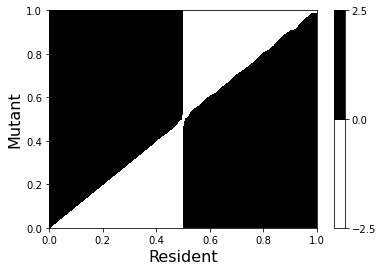

In [5]:
bets=np.linspace(0,1,m)
plt.contourf(bets,bets,phi,0,colors=('w','k'))
plt.xlabel('Resident',fontsize=16)
plt.ylabel('Mutant',fontsize=16)
plt.colorbar()

# Convex Trade-off Function, r

In [19]:
phi=np.zeros((m,m))
N=np.zeros(m)
Y=np.zeros(m)

A = -2
B = -0.2
C = 2

q = 0.05
capgam = 5

ts = np.linspace(0,5000,tmax)

for n in range(0,m):
    beta = n/50
    r = 1/(A*(beta - B)) + C
    
    if n == 0:
        x0=[0.9,0.1]
    elif n > 0:
        x0=[N[n-1],Y[n-1]]
        
    xs = odeint(eqs,x0,ts)
    N[n] = xs[tmax-1:,0]
    Y[n] = xs[tmax-1:,1]
    
    for i in range(0,m):
        betam = i/50
        rm = 1/(A*(betam - B)) + C 
        phi[i][n]= rm - q*(N[n]+Y[n]) - betam*Y[n]

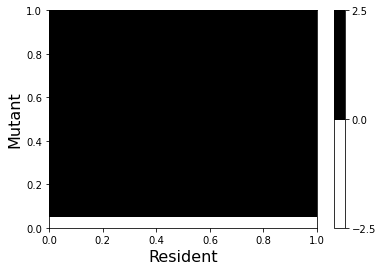

In [20]:
bets=np.linspace(0,1,m)
plt.contourf(bets,bets,phi,0,colors=('w','k'))
plt.xlabel('Resident',fontsize=16)
plt.ylabel('Mutant',fontsize=16)
plt.colorbar()

# Concave Trade-off Function, r

In [14]:
phi=np.zeros((m,m))

N=np.zeros(m)
Y=np.zeros(m)

A = -1
B = 1.2
C = 0.01

q = 0.05
capgam = 0.05

ts = np.linspace(0,5000,tmax)

for n in range(0,m):
    beta = n/50
    r = 1/(A*(beta - B)) + C
    
    if n == 0:
        x0=[0.9,0.1]
    elif n > 0:
        x0=[N[n-1],Y[n-1]]
        
    xs = odeint(eqs,x0,ts)
    N[n] = xs[tmax-1:,0]
    Y[n] = xs[tmax-1:,1]
    for i in range(0,m):
        betam = i/50
        rm = 1/(A*(betam - B)) + C 
        phi[i][n]= rm - q*(N[n]+Y[n]) - betam*Y[n]

C:\Anaconda\lib\site-packages\scipy\integrate\odepack.py:247: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


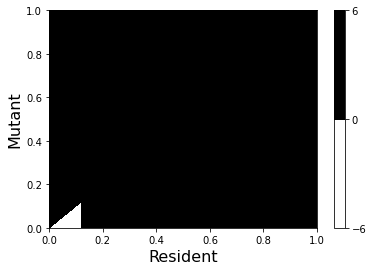

In [15]:
bets=np.linspace(0,1,m)
plt.contourf(bets,bets,phi,0,colors=('w','k'))
plt.xlabel('Resident',fontsize=16)
plt.ylabel('Mutant',fontsize=16)
plt.colorbar()

# Sigmoidal Trade-off Function, r

In [17]:
phi=np.zeros((m,m))

N=np.zeros(m)
Y=np.zeros(m)

A = 2
B = 0.5
C = 3

q = 0.003
capgam = 15

ts = np.linspace(0,5000,tmax)

for n in range(0,m):
    beta = n/50
    r = (A*(beta-B))**C - (A*(-B))**C
    
    if n == 0:
        x0=[0.9,0.1]
    elif n > 0:
        x0=[N[n-1],Y[n-1]]
        
    xs = odeint(eqs,x0,ts)
    N[n] = xs[tmax-1:,0]
    Y[n] = xs[tmax-1:,1]
    for i in range(0,m):
        betam = i/50
        rm = (A*(betam-B))**C - (A*(-B))**C
        phi[i][n]= rm - q*(N[n]+Y[n]) - betam*Y[n]

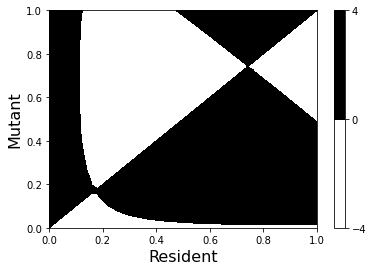

In [18]:
bets=np.linspace(0,1,m)
plt.contourf(bets,bets,phi,0,colors=('w','k'))
plt.xlabel('Resident',fontsize=16)
plt.ylabel('Mutant',fontsize=16)
plt.colorbar()